<a href="https://colab.research.google.com/github/shashikumar1998/ML_Project/blob/main/ML_Data_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#%cd /content/drive/Shared drives/Data\ 245\ -\ ML

#file_path = 'finaliotdataset.txt'
file_path = 'C:\\Users\\shash\\Downloads\\finaliotdataset.txt'

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Read the tab-separated text file into a DataFrame
df = pd.read_csv(file_path, delimiter='\t')

# Display the DataFrame
df

C:\Users\shash\AppData\Local\Temp\ipykernel_28912\32115113.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\t')


,#types,t,uidstring,addr,port,haddr,pport,enum,sstring,interval,...,rcount,connstring,obool,rbool,mbcount,hstring,opcount,obcount,rpcount,ipbcount
0,1532100786.102371,CWeq2B3YXkMYfJ5sl,192.168.100.108,5353.0,224.0.0.251,5353.0,udp,dns,4.133830,1193,...,S0,-,-,0.0,D,11.0,1501.0,0.0,0.0,(empty) Benign -
1,1532100812.196921,CYLFGG1WiaMTVZbVed,192.168.100.108,54360.0,192.168.100.1,53.0,udp,dns,0.000997,78,...,SF,-,-,0.0,Dd,2.0,134.0,2.0,198.0,(empty) Benign -
2,1532100813.201597,CXLNuE10OdgwToBIb8,192.168.100.108,53971.0,192.168.100.1,53.0,udp,dns,0.054470,78,...,SF,-,-,0.0,Dd,2.0,134.0,2.0,310.0,(empty) Benign -
3,1532100814.272486,COdAkSYAcGOu6J139,192.168.100.108,57415.0,192.168.100.1,53.0,udp,dns,0.053221,78,...,SF,-,-,0.0,Dd,2.0,134.0,2.0,253.0,(empty) Benign -
4,1532100814.328455,CrDWAb2IPhhFQIN75e,192.168.100.108,34266.0,192.168.100.1,53.0,udp,dns,0.031732,78,...,SF,-,-,0.0,Dd,2.0,134.0,2.0,253.0,(empty) Benign -
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11448421,1532187029.115683,CK0ALv1sLwqLSzihlj,212.144.235.74,3.0,192.168.100.108,1.0,icmp,-,-,-,...,OTH,-,-,0.0,-,1.0,68.0,0.0,0.0,(empty) Benign -
11448422,1532186994.959568,CcmYQw1uthYpacXVMl,193.136.134.150,3.0,192.168.100.108,1.0,icmp,-,35.342305,80,...,OTH,-,-,0.0,-,2.0,136.0,0.0,0.0,(empty) Benign -
11448423,1532187057.469573,CPzoom3ZYNkUdHfRJc,154.196.138.6,3.0,192.168.100.108,10.0,icmp,-,-,-,...,OTH,-,-,0.0,-,1.0,68.0,0.0,0.0,(empty) Benign -
11448424,1532187066.809124,CgmRAT27X32PN3he8l,154.202.131.93,3.0,192.168.100.108,10.0,icmp,-,-,-,...,OTH,-,-,0.0,-,1.0,68.0,0.0,0.0,(empty) Benign -


Exploratory Data Analysis

In [ ]:
#Check to see the number of null in different columns
null_counts = df.isnull().sum()
print(null_counts)

#types        0
t             1
uidstring     2
addr          2
port          2
haddr         2
pport         2
enum          2
sstring       2
interval      2
bcount        2
rcount        2
connstring    2
obool         2
rbool         2
mbcount       2
hstring       2
opcount       2
obcount       2
rpcount       2
ipbcount      2
dtype: int64


In [ ]:
#Check the datatypes of the various raw columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11448426 entries, 0 to 11448425
Data columns (total 21 columns):
 #   Column      Dtype  
---  ------      -----  
 0   #types      object 
 1   t           object 
 2   uidstring   object 
 3   addr        float64
 4   port        object 
 5   haddr       float64
 6   pport       object 
 7   enum        object 
 8   sstring     object 
 9   interval    object 
 10  bcount      object 
 11  rcount      object 
 12  connstring  object 
 13  obool       object 
 14  rbool       float64
 15  mbcount     object 
 16  hstring     float64
 17  opcount     float64
 18  obcount     float64
 19  rpcount     float64
 20  ipbcount    object 
dtypes: float64(7), object(14)
memory usage: 1.8+ GB


In [ ]:
#Check the spread of numerical data types
df.describe()

,addr,haddr,rbool,hstring,opcount,obcount,rpcount
count,1.144842e+07,1.144842e+07,1.144842e+07,1.144842e+07,1.144842e+07,1.144842e+07,1.144842e+07
mean,5.796012e+03,3.685047e+04,8.909523e-06,1.002379e+00,4.566753e+01,1.646515e-03,7.559827e-02
std,3.349481e+03,3.742351e+03,3.014584e-02,1.680197e-01,6.522786e+01,9.091961e-02,4.911753e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.526000e+03,3.721500e+04,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
50%,5.526000e+03,3.721500e+04,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
75%,5.526000e+03,3.721500e+04,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
max,6.553400e+04,5.875600e+04,1.020000e+02,3.500000e+02,1.855700e+04,1.780000e+02,9.608000e+03


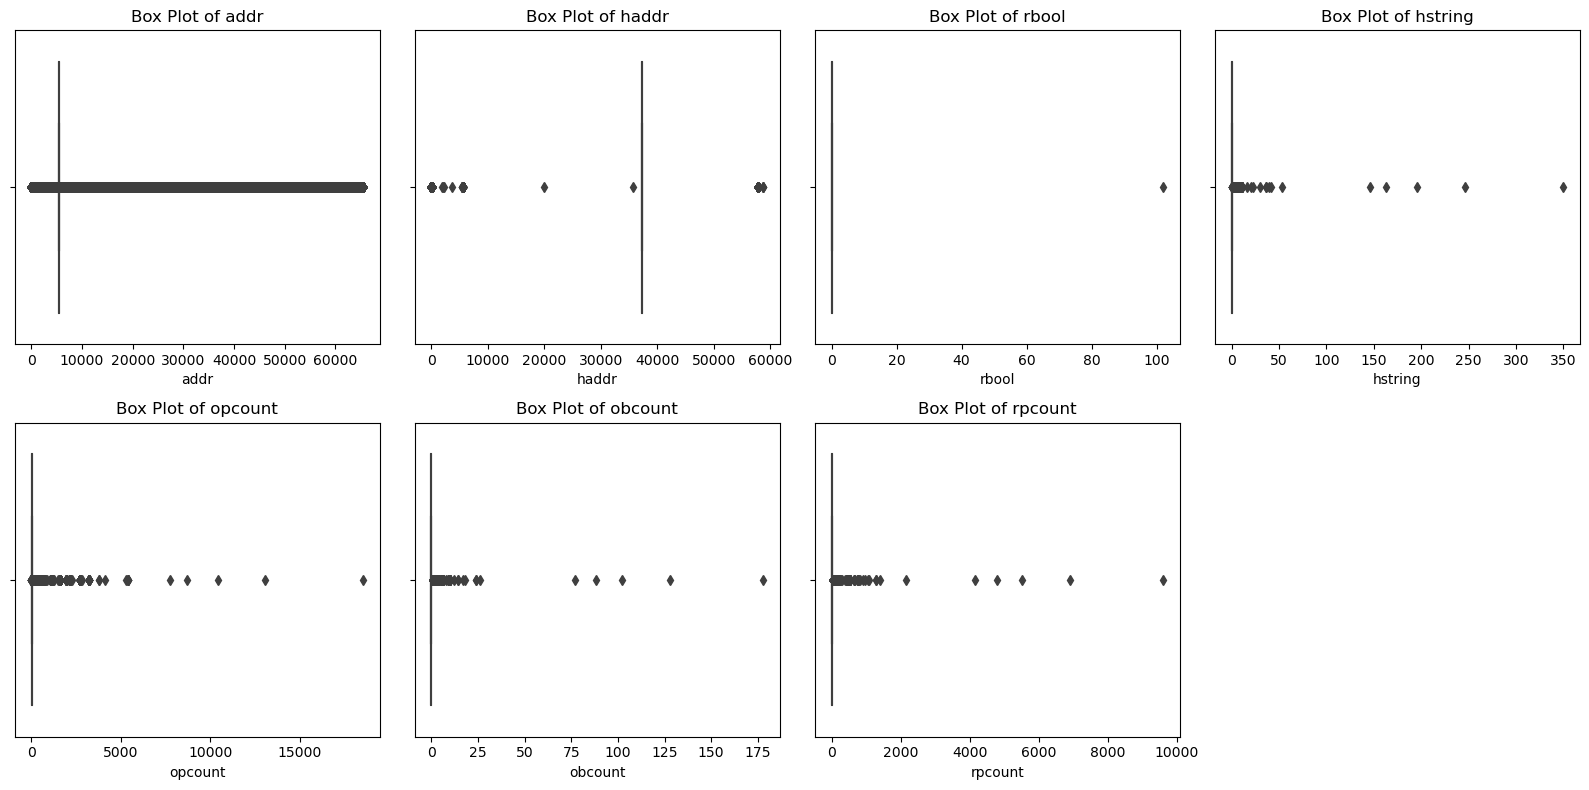

In [ ]:
#Box plot to undestand the spread of values
# Separate numeric and categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create box plots for numeric columns
plt.figure(figsize=(16, 8))
for i, column in enumerate(numeric_columns):
    plt.subplot(2, (len(numeric_columns)//2)+1, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

<ipython-input-4-0f77f5002df3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


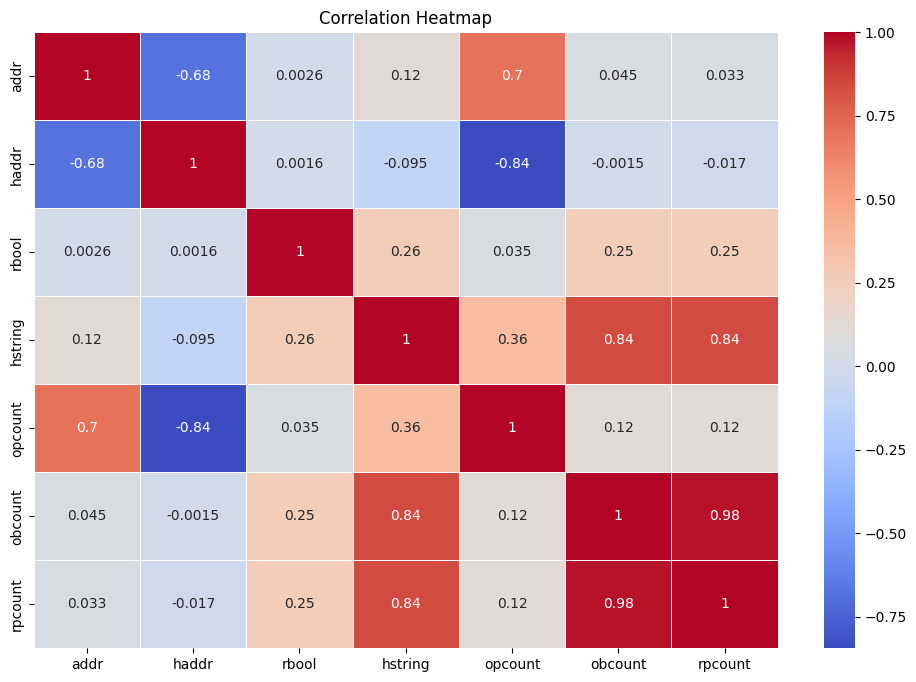

In [ ]:
#Correlation matrix to understand the correlation between the different columns
correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

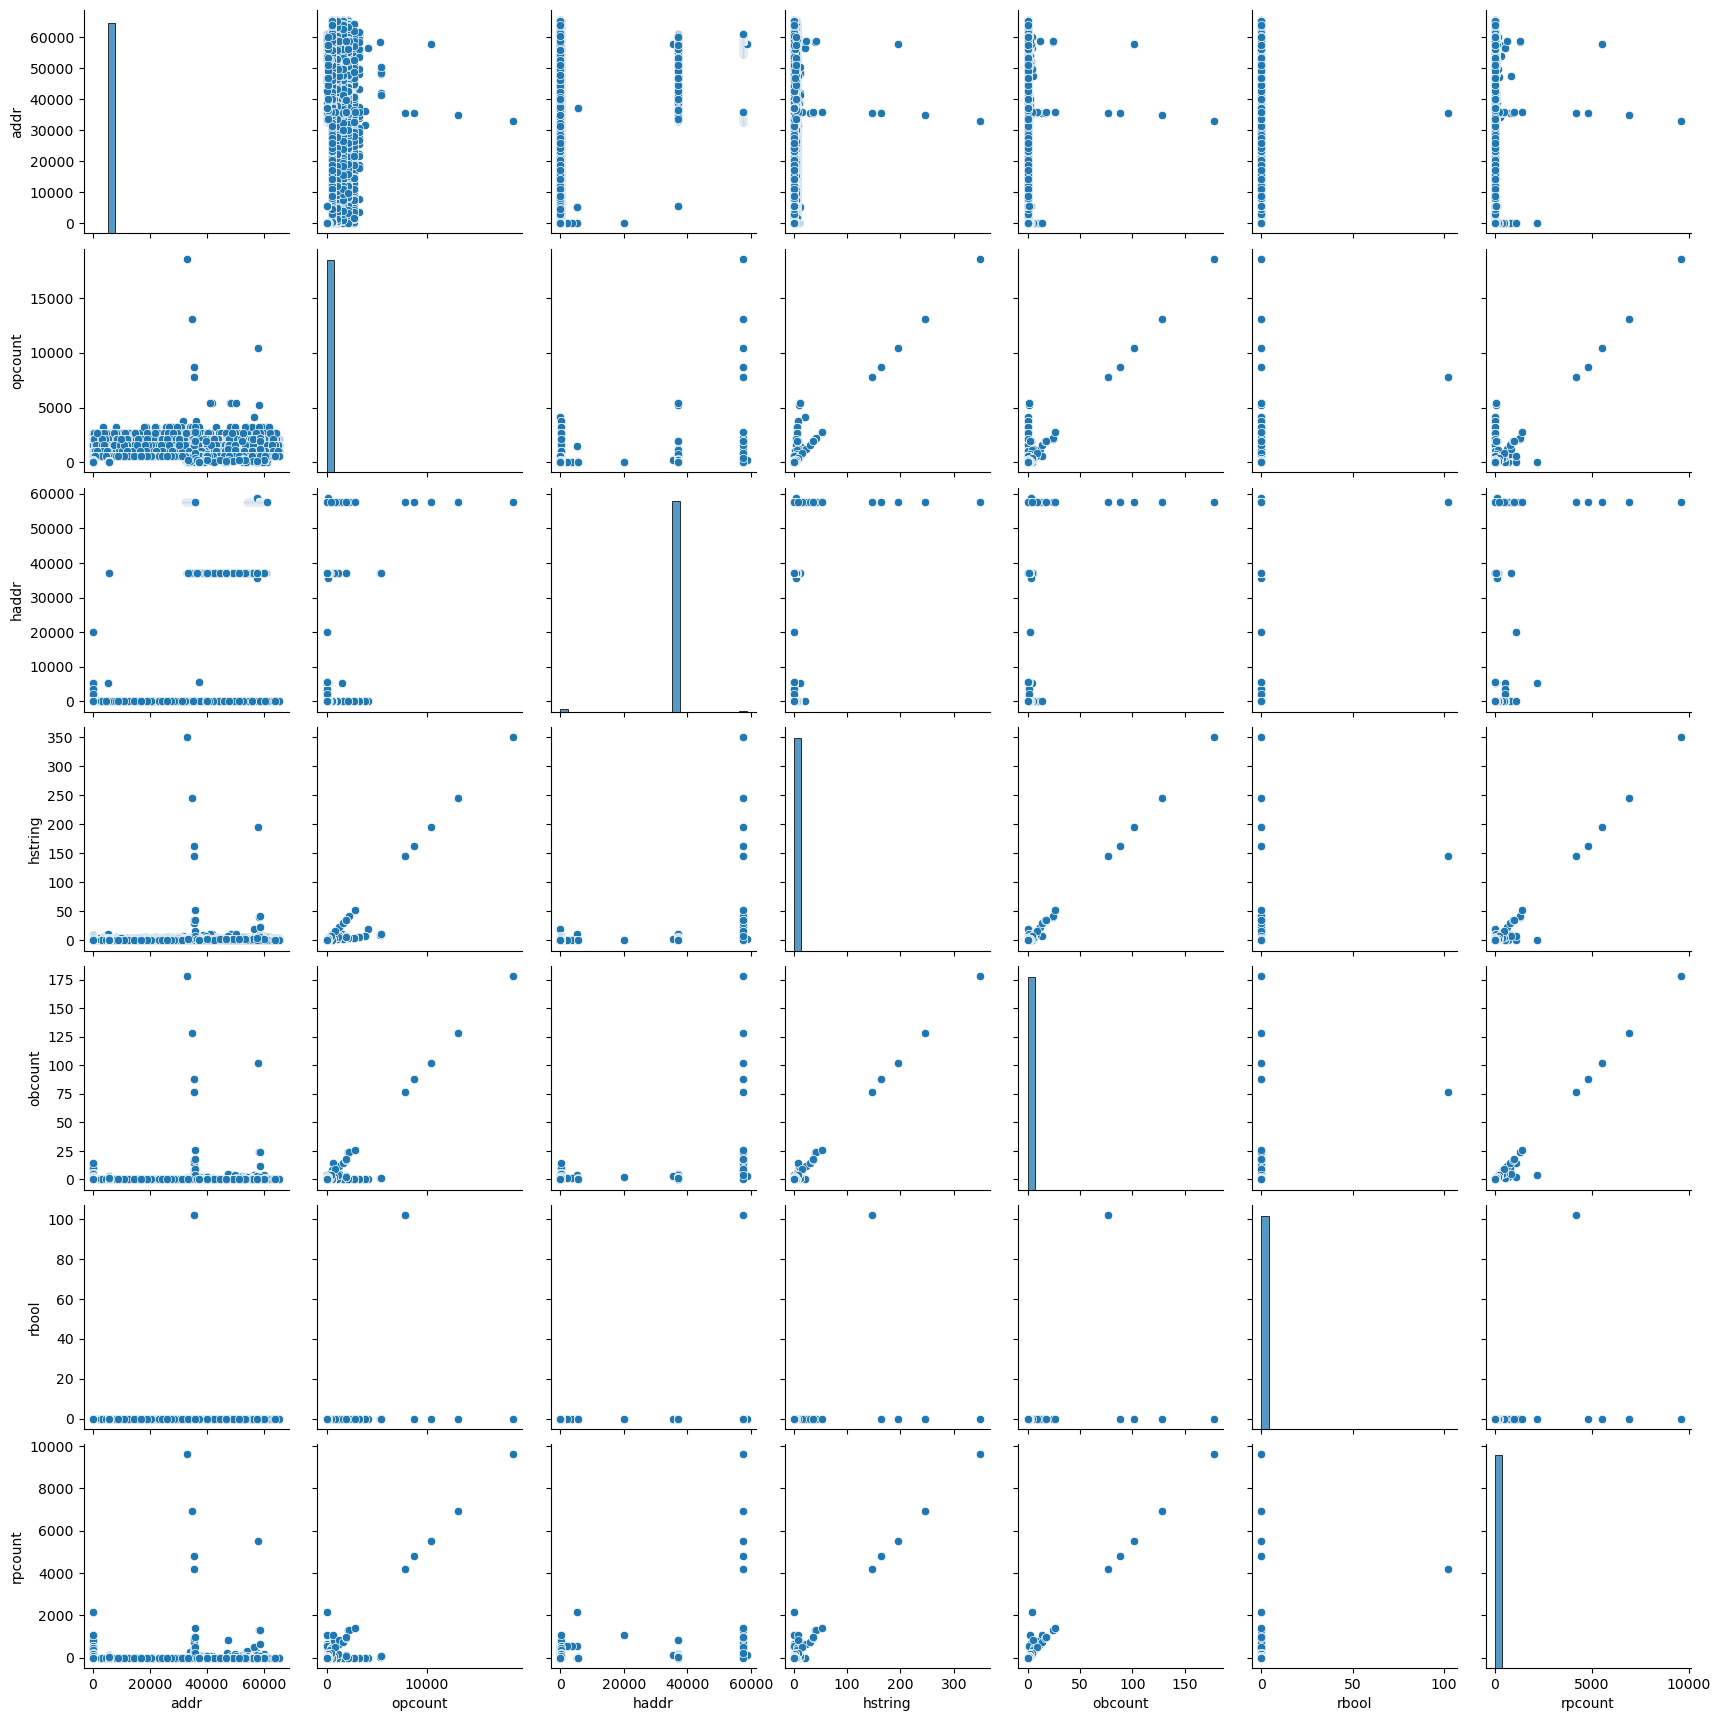

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_for_pair_plot = ['addr', 'opcount', 'haddr', 'hstring','obcount','rbool','rpcount']

sns.pairplot(df[columns_for_pair_plot])

plt.show()

In [ ]:
#Displaying addr values using histogram
df['addr'].value_counts()

5526.0     11326800
3.0            4507
123.0          3043
11.0           2527
37215.0         123
             ...   
16275.0           1
52102.0           1
50099.0           1
27177.0           1
39604.0           1
Name: addr, Length: 56640, dtype: int64

In [ ]:
#Displaying haddr values using histogram
df['haddr'].value_counts()

37215.0    11327119
53.0          65731
80.0          39584
57722.0        5771
123.0          3043
0.0            2871
1.0            2154
13.0           1499
10.0            367
3.0             141
5526.0          121
22.0              4
5353.0            3
9.0               2
8.0               1
5355.0            1
67.0              1
161.0             1
1812.0            1
162.0             1
2123.0            1
3544.0            1
20000.0           1
2152.0            1
58716.0           1
58726.0           1
58756.0           1
35598.0           1
Name: haddr, dtype: int64

In [ ]:
#Displaying rbool values using histogram
df['rbool'].value_counts()

0.0      11448423
102.0           1
Name: rbool, dtype: int64

In [ ]:
#Displaying hstring values using histogram
df['hstring'].value_counts()

1.0      11430291
2.0         11770
3.0          5305
4.0           803
5.0           154
6.0            44
0.0            13
10.0            9
11.0            7
8.0             7
7.0             5
36.0            2
9.0             2
246.0           1
16.0            1
163.0           1
30.0            1
146.0           1
196.0           1
350.0           1
42.0            1
23.0            1
40.0            1
20.0            1
53.0            1
Name: hstring, dtype: int64

In [ ]:
#Displaying opcount values using histogram
df['opcount'].value_counts()

40.0      11326627
540.0        89719
1080.0       11193
60.0          3904
1620.0        3424
            ...   
608.0            1
2247.0           1
272.0            1
1212.0           1
2810.0           1
Name: opcount, Length: 75, dtype: int64

In [ ]:
#Displaying obcount values using histogram
df['obcount'].value_counts()

0.0      11430505
1.0         17836
2.0            30
6.0            11
3.0             9
4.0             7
10.0            7
5.0             3
9.0             2
24.0            2
14.0            2
102.0           1
12.0            1
178.0           1
128.0           1
77.0            1
8.0             1
88.0            1
17.0            1
18.0            1
26.0            1
Name: obcount, dtype: int64

In [ ]:
#Displaying rpcount values using histogram
df['rpcount'].value_counts()

0.0       11430505
40.0         15242
76.0          2301
44.0           240
72.0            28
456.0           11
84.0             9
152.0            7
760.0            7
540.0            7
120.0            6
63.0             5
80.0             5
52.0             4
71.0             2
82.0             2
228.0            2
172.0            2
216.0            2
198.0            2
46.0             2
253.0            2
88.0             1
48.0             1
972.0            1
484.0            1
916.0            1
310.0            1
4792.0           1
380.0            1
270.0            1
756.0            1
104.0            1
108.0            1
438.0            1
4166.0           1
660.0            1
6916.0           1
124.0            1
9608.0           1
836.0            1
1298.0           1
1064.0           1
684.0            1
650.0            1
1080.0           1
2160.0           1
512.0            1
504.0            1
1290.0           1
112.0            1
5504.0           1
1404.0      

**Data Cleansing**

In [ ]:
#Data before cleansing
df

,#types,t,uidstring,addr,port,haddr,pport,enum,sstring,interval,...,rcount,connstring,obool,rbool,mbcount,hstring,opcount,obcount,rpcount,ipbcount
0,1532100786.102371,CWeq2B3YXkMYfJ5sl,192.168.100.108,5353.0,224.0.0.251,5353.0,udp,dns,4.133830,1193,...,S0,-,-,0.0,D,11.0,1501.0,0.0,0.0,(empty) Benign -
1,1532100812.196921,CYLFGG1WiaMTVZbVed,192.168.100.108,54360.0,192.168.100.1,53.0,udp,dns,0.000997,78,...,SF,-,-,0.0,Dd,2.0,134.0,2.0,198.0,(empty) Benign -
2,1532100813.201597,CXLNuE10OdgwToBIb8,192.168.100.108,53971.0,192.168.100.1,53.0,udp,dns,0.054470,78,...,SF,-,-,0.0,Dd,2.0,134.0,2.0,310.0,(empty) Benign -
3,1532100814.272486,COdAkSYAcGOu6J139,192.168.100.108,57415.0,192.168.100.1,53.0,udp,dns,0.053221,78,...,SF,-,-,0.0,Dd,2.0,134.0,2.0,253.0,(empty) Benign -
4,1532100814.328455,CrDWAb2IPhhFQIN75e,192.168.100.108,34266.0,192.168.100.1,53.0,udp,dns,0.031732,78,...,SF,-,-,0.0,Dd,2.0,134.0,2.0,253.0,(empty) Benign -
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11448421,1532187029.115683,CK0ALv1sLwqLSzihlj,212.144.235.74,3.0,192.168.100.108,1.0,icmp,-,-,-,...,OTH,-,-,0.0,-,1.0,68.0,0.0,0.0,(empty) Benign -
11448422,1532186994.959568,CcmYQw1uthYpacXVMl,193.136.134.150,3.0,192.168.100.108,1.0,icmp,-,35.342305,80,...,OTH,-,-,0.0,-,2.0,136.0,0.0,0.0,(empty) Benign -
11448423,1532187057.469573,CPzoom3ZYNkUdHfRJc,154.196.138.6,3.0,192.168.100.108,10.0,icmp,-,-,-,...,OTH,-,-,0.0,-,1.0,68.0,0.0,0.0,(empty) Benign -
11448424,1532187066.809124,CgmRAT27X32PN3he8l,154.202.131.93,3.0,192.168.100.108,10.0,icmp,-,-,-,...,OTH,-,-,0.0,-,1.0,68.0,0.0,0.0,(empty) Benign -


In [ ]:
#Rename column names to interpretable format
df=df.rename(columns={'#types':'types','t':'ts_time','uidstring':'uid_string','addr':'id.orig_addr','port':'id.orig_port','haddr':'id.resp_haddr','pport':'id.resp_pport','enum':'proto_enum','sstring':'service_string','interval':'duration_interval','bcount':'orig_bytes_count','rcount':'resp_bytes_count','connstring':'conn_state_string','obool':'local_orig_bool','rbool':'local_resp_bool','mbcount':'missed_bytes_count','hstring':'history_string','opcount':'orig_pkts_count','obcount':'orig_ip_bytes_count','rpcount':'resp_pkts_count','ipbcount':'Category'})
df

,types,ts_time,uid_string,id.orig_addr,id.orig_port,id.resp_haddr,id.resp_pport,proto_enum,service_string,duration_interval,...,resp_bytes_count,conn_state_string,local_orig_bool,local_resp_bool,missed_bytes_count,history_string,orig_pkts_count,orig_ip_bytes_count,resp_pkts_count,Category
0,1532100786.102371,CWeq2B3YXkMYfJ5sl,192.168.100.108,5353.0,224.0.0.251,5353.0,udp,dns,4.133830,1193,...,S0,-,-,0.0,D,11.0,1501.0,0.0,0.0,(empty) Benign -
1,1532100812.196921,CYLFGG1WiaMTVZbVed,192.168.100.108,54360.0,192.168.100.1,53.0,udp,dns,0.000997,78,...,SF,-,-,0.0,Dd,2.0,134.0,2.0,198.0,(empty) Benign -
2,1532100813.201597,CXLNuE10OdgwToBIb8,192.168.100.108,53971.0,192.168.100.1,53.0,udp,dns,0.054470,78,...,SF,-,-,0.0,Dd,2.0,134.0,2.0,310.0,(empty) Benign -
3,1532100814.272486,COdAkSYAcGOu6J139,192.168.100.108,57415.0,192.168.100.1,53.0,udp,dns,0.053221,78,...,SF,-,-,0.0,Dd,2.0,134.0,2.0,253.0,(empty) Benign -
4,1532100814.328455,CrDWAb2IPhhFQIN75e,192.168.100.108,34266.0,192.168.100.1,53.0,udp,dns,0.031732,78,...,SF,-,-,0.0,Dd,2.0,134.0,2.0,253.0,(empty) Benign -
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11448421,1532187029.115683,CK0ALv1sLwqLSzihlj,212.144.235.74,3.0,192.168.100.108,1.0,icmp,-,-,-,...,OTH,-,-,0.0,-,1.0,68.0,0.0,0.0,(empty) Benign -
11448422,1532186994.959568,CcmYQw1uthYpacXVMl,193.136.134.150,3.0,192.168.100.108,1.0,icmp,-,35.342305,80,...,OTH,-,-,0.0,-,2.0,136.0,0.0,0.0,(empty) Benign -
11448423,1532187057.469573,CPzoom3ZYNkUdHfRJc,154.196.138.6,3.0,192.168.100.108,10.0,icmp,-,-,-,...,OTH,-,-,0.0,-,1.0,68.0,0.0,0.0,(empty) Benign -
11448424,1532187066.809124,CgmRAT27X32PN3he8l,154.202.131.93,3.0,192.168.100.108,10.0,icmp,-,-,-,...,OTH,-,-,0.0,-,1.0,68.0,0.0,0.0,(empty) Benign -


In [ ]:
#Drop columns that are not required
df.drop(columns=['id.resp_pport','resp_bytes_count','ts_time','proto_enum','conn_state_string','local_orig_bool','service_string','duration_interval','orig_bytes_count','local_resp_bool','types'],inplace=True)
df.columns

Index(['uid_string', 'id.orig_addr', 'id.orig_port', 'id.resp_haddr',
       'missed_bytes_count', 'history_string', 'orig_pkts_count',
       'orig_ip_bytes_count', 'resp_pkts_count', 'Category'],
      dtype='object')

In [ ]:
# Remove rows with missing values
# Define the columns for which you want to check missing values
columns_to_check = ['uid_string', 'id.orig_addr', 'id.resp_haddr']
df_cleaned = df.dropna(subset=columns_to_check,how='all')

df_cleaned

,uid_string,id.orig_addr,id.orig_port,id.resp_haddr,missed_bytes_count,history_string,orig_pkts_count,orig_ip_bytes_count,resp_pkts_count,Category
0,192.168.100.108,5353.0,224.0.0.251,5353.0,D,11.0,1501.0,0.0,0.0,(empty) Benign -
1,192.168.100.108,54360.0,192.168.100.1,53.0,Dd,2.0,134.0,2.0,198.0,(empty) Benign -
2,192.168.100.108,53971.0,192.168.100.1,53.0,Dd,2.0,134.0,2.0,310.0,(empty) Benign -
3,192.168.100.108,57415.0,192.168.100.1,53.0,Dd,2.0,134.0,2.0,253.0,(empty) Benign -
4,192.168.100.108,34266.0,192.168.100.1,53.0,Dd,2.0,134.0,2.0,253.0,(empty) Benign -
...,...,...,...,...,...,...,...,...,...,...
11448420,2.203.14.58,3.0,192.168.100.108,13.0,-,1.0,56.0,0.0,0.0,(empty) Benign -
11448421,212.144.235.74,3.0,192.168.100.108,1.0,-,1.0,68.0,0.0,0.0,(empty) Benign -
11448422,193.136.134.150,3.0,192.168.100.108,1.0,-,2.0,136.0,0.0,0.0,(empty) Benign -
11448423,154.196.138.6,3.0,192.168.100.108,10.0,-,1.0,68.0,0.0,0.0,(empty) Benign -


In [ ]:
#Replace '-' with nulls since they are of no use
df_cleaned = df_cleaned.replace('-', np.nan)

In [ ]:
#Drop duplicate values in the dataset
data = df_cleaned.drop_duplicates(subset=df_cleaned.columns.tolist())
data

,uid_string,id.orig_addr,id.orig_port,id.resp_haddr,missed_bytes_count,history_string,orig_pkts_count,orig_ip_bytes_count,resp_pkts_count,Category
0,192.168.100.108,5353.0,224.0.0.251,5353.0,D,11.0,1501.0,0.0,0.0,(empty) Benign -
1,192.168.100.108,54360.0,192.168.100.1,53.0,Dd,2.0,134.0,2.0,198.0,(empty) Benign -
2,192.168.100.108,53971.0,192.168.100.1,53.0,Dd,2.0,134.0,2.0,310.0,(empty) Benign -
3,192.168.100.108,57415.0,192.168.100.1,53.0,Dd,2.0,134.0,2.0,253.0,(empty) Benign -
4,192.168.100.108,34266.0,192.168.100.1,53.0,Dd,2.0,134.0,2.0,253.0,(empty) Benign -
...,...,...,...,...,...,...,...,...,...,...
11448420,2.203.14.58,3.0,192.168.100.108,13.0,NaN,1.0,56.0,0.0,0.0,(empty) Benign -
11448421,212.144.235.74,3.0,192.168.100.108,1.0,NaN,1.0,68.0,0.0,0.0,(empty) Benign -
11448422,193.136.134.150,3.0,192.168.100.108,1.0,NaN,2.0,136.0,0.0,0.0,(empty) Benign -
11448423,154.196.138.6,3.0,192.168.100.108,10.0,NaN,1.0,68.0,0.0,0.0,(empty) Benign -


**Data Transformation**

In [ ]:
# Encode the categorical column
label_encoder = LabelEncoder()
data['missed_bytes_count'] = label_encoder.fit_transform(data['missed_bytes_count'])

C:\Users\shash\AppData\Local\Temp\ipykernel_28912\301032071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['missed_bytes_count'] = label_encoder.fit_transform(data['missed_bytes_count'])


In [ ]:
#KNNImputer used to handle the missing values in missed_byte_count column after performing Label encoding
# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
# Reshape the data and impute missing values
imputed_data = knn_imputer.fit_transform(data['missed_bytes_count'].values.reshape(-1, 1))
# Convert the imputed data back to a DataFrame
data['missed_bytes_count'] = pd.DataFrame(imputed_data, columns=['missed_bytes_count'])
data

C:\Users\shash\AppData\Local\Temp\ipykernel_28912\395404211.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['missed_bytes_count'] = pd.DataFrame(imputed_data, columns=['missed_bytes_count'])


,uid_string,id.orig_addr,id.orig_port,id.resp_haddr,missed_bytes_count,history_string,orig_pkts_count,orig_ip_bytes_count,resp_pkts_count,Category
0,192.168.100.108,5353.0,224.0.0.251,5353.0,1.0,11.0,1501.0,0.0,0.0,(empty) Benign -
1,192.168.100.108,54360.0,192.168.100.1,53.0,3.0,2.0,134.0,2.0,198.0,(empty) Benign -
2,192.168.100.108,53971.0,192.168.100.1,53.0,3.0,2.0,134.0,2.0,310.0,(empty) Benign -
3,192.168.100.108,57415.0,192.168.100.1,53.0,3.0,2.0,134.0,2.0,253.0,(empty) Benign -
4,192.168.100.108,34266.0,192.168.100.1,53.0,3.0,2.0,134.0,2.0,253.0,(empty) Benign -
...,...,...,...,...,...,...,...,...,...,...
11448420,2.203.14.58,3.0,192.168.100.108,13.0,NaN,1.0,56.0,0.0,0.0,(empty) Benign -
11448421,212.144.235.74,3.0,192.168.100.108,1.0,NaN,1.0,68.0,0.0,0.0,(empty) Benign -
11448422,193.136.134.150,3.0,192.168.100.108,1.0,NaN,2.0,136.0,0.0,0.0,(empty) Benign -
11448423,154.196.138.6,3.0,192.168.100.108,10.0,NaN,1.0,68.0,0.0,0.0,(empty) Benign -


C:\Users\shash\AppData\Local\Temp\ipykernel_28912\1871059777.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Category'] = data['Category'].replace(mapping_dict)


Count of 'Non DDoS': 11386436
Count of 'Malicious DDoS': 39584


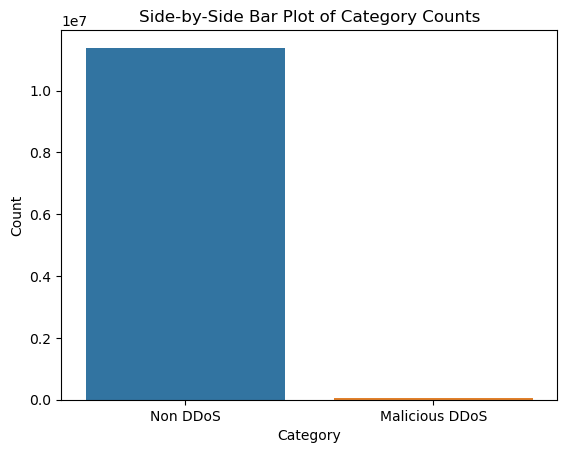

In [ ]:
#Categorize the attacks to Malicious DDoS and Non DDoS
mapping_dict = {
    '(empty)   Benign   -': 'Non DDoS',
    '(empty)   Malicious   C&C-HeartBeat': 'Non DDoS',
    '(empty)   Malicious   Okiru': 'Non DDoS',
    '(empty)   Malicious   DDoS': 'Malicious DDoS',
    'COLnd035cNITygYHp3   Benign   -': 'Non DDoS',
    'CARhxZ3hLNVO3xYFok   Benign   -': 'Non DDoS'
}

data['Category'] = data['Category'].replace(mapping_dict)

value_counts = data['Category'].value_counts()
non_ddos_count = value_counts.get('Non DDoS', 0)
malicious_ddos_count = value_counts.get('Malicious DDoS', 0)
print("Count of 'Non DDoS':", non_ddos_count)
print("Count of 'Malicious DDoS':", malicious_ddos_count)

import seaborn as sns
import matplotlib.pyplot as plt
counts_df = pd.DataFrame({'Category': ['Non DDoS', 'Malicious DDoS'], 'Count': [non_ddos_count, malicious_ddos_count]})

# Create a side-by-side bar plot
sns.barplot(x='Category', y='Count', data=counts_df)

# Set plot labels and title
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Side-by-Side Bar Plot of Category Counts")

# Show the plot
plt.show()

In [ ]:
#Check if any column has null values
data.isnull().sum()

uid_string                 0
id.orig_addr               0
id.orig_port               0
id.resp_haddr              0
missed_bytes_count     22332
history_string             0
orig_pkts_count            0
orig_ip_bytes_count        0
resp_pkts_count            0
Category                   0
dtype: int64

In [ ]:
#Handle missing values in missed_bytes_count
data.dropna(subset=['missed_bytes_count'],inplace=True)
data.isnull().sum()

C:\Users\shash\AppData\Local\Temp\ipykernel_28912\983247182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['missed_bytes_count'],inplace=True)


uid_string             0
id.orig_addr           0
id.orig_port           0
id.resp_haddr          0
missed_bytes_count     0
history_string         0
orig_pkts_count        0
orig_ip_bytes_count    0
resp_pkts_count        0
Category               0
dtype: int64

In [ ]:
#Use StandardScaler function to standardize the data
from sklearn.preprocessing import StandardScaler# Initialize the StandardScaler
scaler = StandardScaler()
columns=['history_string','orig_pkts_count','orig_ip_bytes_count','resp_pkts_count']
for column in columns:
    # Fit and transform the scaler on the data
    scaled_data = scaler.fit_transform(data[[column]])
    # Create a DataFrame with the standardized features
    data[column] = scaled_data

C:\Users\shash\AppData\Local\Temp\ipykernel_28912\1756449678.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaled_data
C:\Users\shash\AppData\Local\Temp\ipykernel_28912\1756449678.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaled_data
C:\Users\shash\AppData\Local\Temp\ipykernel_28912\1756449678.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
#Data after standardization
data

,uid_string,id.orig_addr,id.orig_port,id.resp_haddr,missed_bytes_count,history_string,orig_pkts_count,orig_ip_bytes_count,resp_pkts_count,Category
0,192.168.100.108,5353.0,224.0.0.251,5353.0,1.0,59.653202,22.270777,-0.016117,-0.012590,Non DDoS
1,192.168.100.108,54360.0,192.168.100.1,53.0,3.0,5.952537,1.351589,22.326843,41.504154,Non DDoS
2,192.168.100.108,53971.0,192.168.100.1,53.0,3.0,5.952537,1.351589,22.326843,64.988373,Non DDoS
3,192.168.100.108,57415.0,192.168.100.1,53.0,3.0,5.952537,1.351589,22.326843,53.036583,Non DDoS
4,192.168.100.108,34266.0,192.168.100.1,53.0,3.0,5.952537,1.351589,22.326843,53.036583,Non DDoS
...,...,...,...,...,...,...,...,...,...,...
11426015,192.168.100.108,5526.0,9.142.38.44,37215.0,29.0,-0.014204,-0.086892,-0.016117,-0.012590,Non DDoS
11426016,192.168.100.108,5526.0,77.6.97.156,37215.0,29.0,-0.014204,-0.086892,-0.016117,-0.012590,Non DDoS
11426017,192.168.100.108,5526.0,169.172.173.135,37215.0,29.0,-0.014204,-0.086892,-0.016117,-0.012590,Non DDoS
11426018,192.168.100.108,5526.0,192.188.69.18,37215.0,29.0,-0.014204,-0.086892,-0.016117,-0.012590,Non DDoS


In [ ]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [ ]:
#DDos = 1 else 0
data['Category'] = np.where(data['Category'] == 'Non DDoS' , 0, 1)

C:\Users\shash\AppData\Local\Temp\ipykernel_28912\2623445043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Category'] = np.where(data['Category'] == 'Non DDoS' , 0, 1)


In [ ]:
data

,uid_string,id.orig_addr,id.orig_port,id.resp_haddr,missed_bytes_count,history_string,orig_pkts_count,orig_ip_bytes_count,resp_pkts_count,Category
0,192.168.100.108,5353.0,224.0.0.251,5353.0,1.0,59.653202,22.270777,-0.016117,-0.012590,0
1,192.168.100.108,54360.0,192.168.100.1,53.0,3.0,5.952537,1.351589,22.326843,41.504154,0
2,192.168.100.108,53971.0,192.168.100.1,53.0,3.0,5.952537,1.351589,22.326843,64.988373,0
3,192.168.100.108,57415.0,192.168.100.1,53.0,3.0,5.952537,1.351589,22.326843,53.036583,0
4,192.168.100.108,34266.0,192.168.100.1,53.0,3.0,5.952537,1.351589,22.326843,53.036583,0
...,...,...,...,...,...,...,...,...,...,...
11426015,192.168.100.108,5526.0,9.142.38.44,37215.0,29.0,-0.014204,-0.086892,-0.016117,-0.012590,0
11426016,192.168.100.108,5526.0,77.6.97.156,37215.0,29.0,-0.014204,-0.086892,-0.016117,-0.012590,0
11426017,192.168.100.108,5526.0,169.172.173.135,37215.0,29.0,-0.014204,-0.086892,-0.016117,-0.012590,0
11426018,192.168.100.108,5526.0,192.188.69.18,37215.0,29.0,-0.014204,-0.086892,-0.016117,-0.012590,0
